In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
#Load the data
df = pd.read_csv('fhs_train.csv')

In [115]:
#Identifying missing values
print(df.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education           85
currentSmoker        0
cigsPerDay          24
BPMeds              37
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             39
sysBP                0
diaBP                0
BMI                 15
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


In [116]:
# Impute missing values for variables with low missings using median (avoid outliers)
df['education'].fillna(df['education'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(), inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

In [117]:
print(df.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            285
TenYearCHD           0
dtype: int64


In [118]:
#For glucose, which has a relatively high missing value count, we will use some linear regression to do predictive imputation.
from sklearn.linear_model import LinearRegression
# Separate data
complete_data = df[df['glucose'].notnull()]
missing_data = df[df['glucose'].isnull()]

# Define features and target for imputation
X_train = complete_data.drop(['glucose'], axis=1)
y_train = complete_data['glucose']
X_incomplete = missing_data.drop(['glucose'], axis=1)

# init. and train linear regression model for imputation
imputation_model = LinearRegression()
imputation_model.fit(X_train, y_train)

# missing values
imputed_values = imputation_model.predict(X_incomplete)

# Fill missing values in the original dataframe
df.loc[df['glucose'].isnull(), 'glucose'] = imputed_values

In [119]:
print(df.isnull().sum())

Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


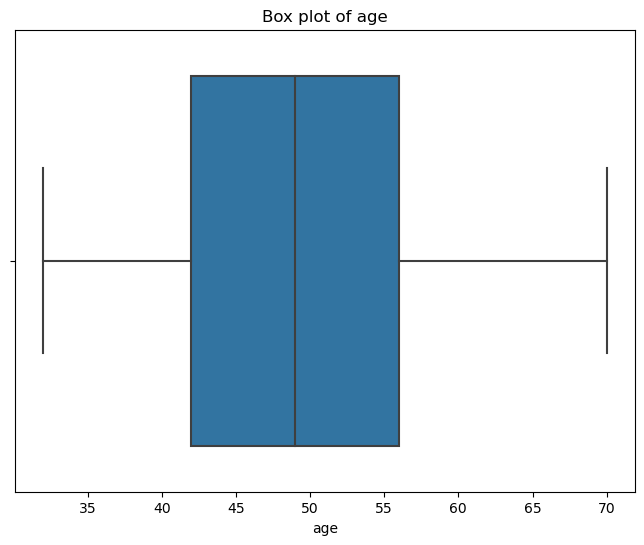

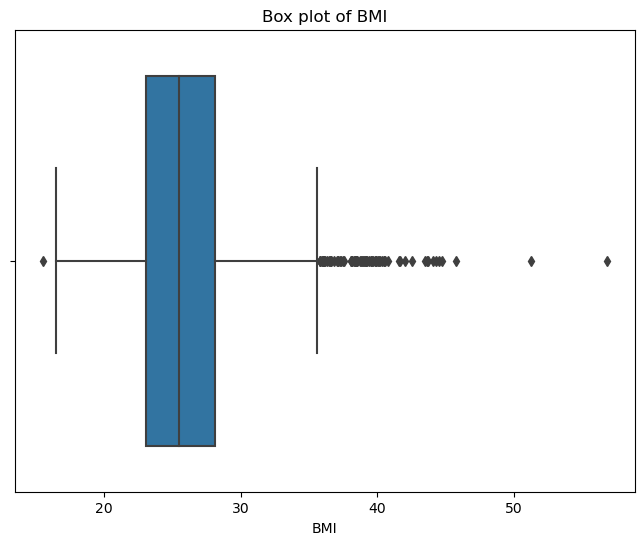

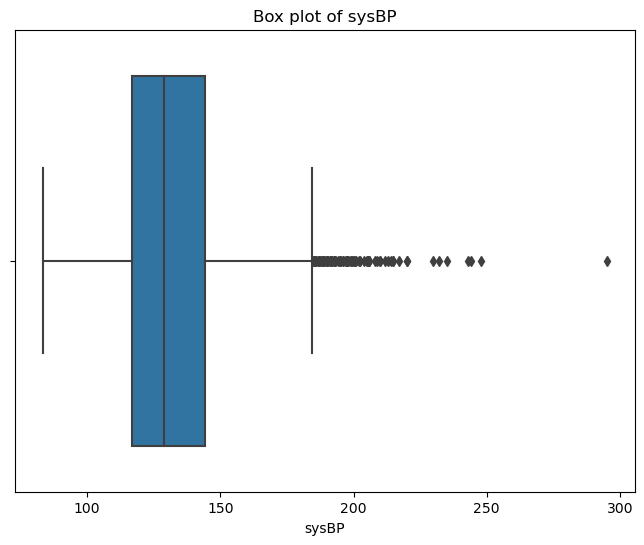

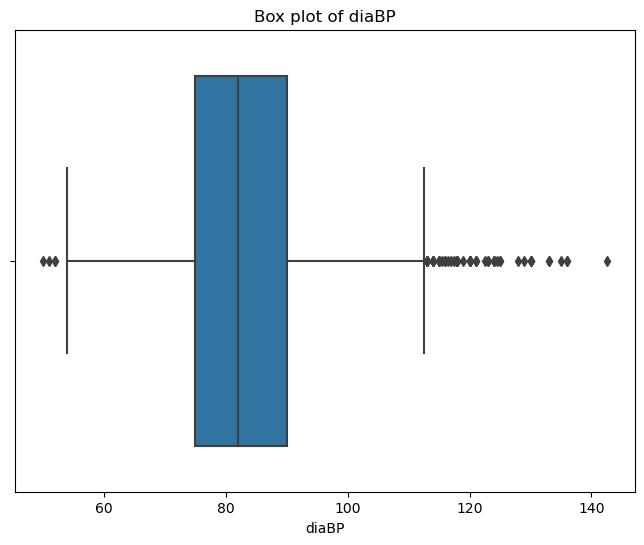

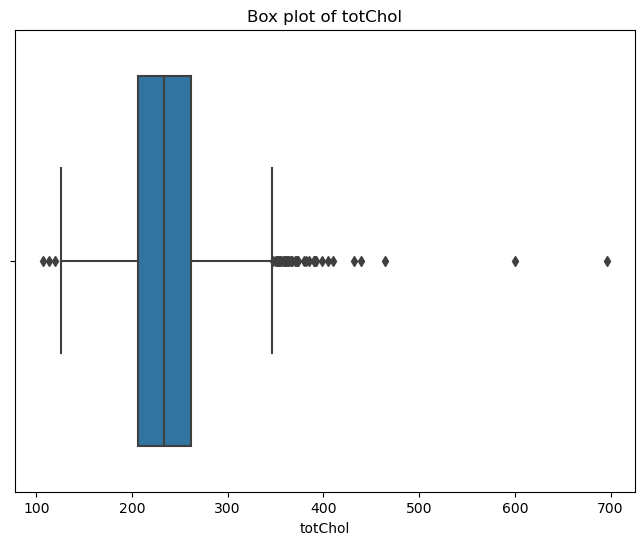

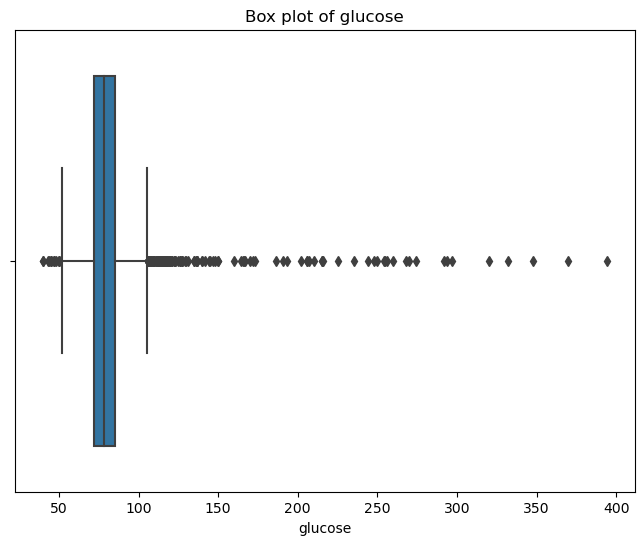

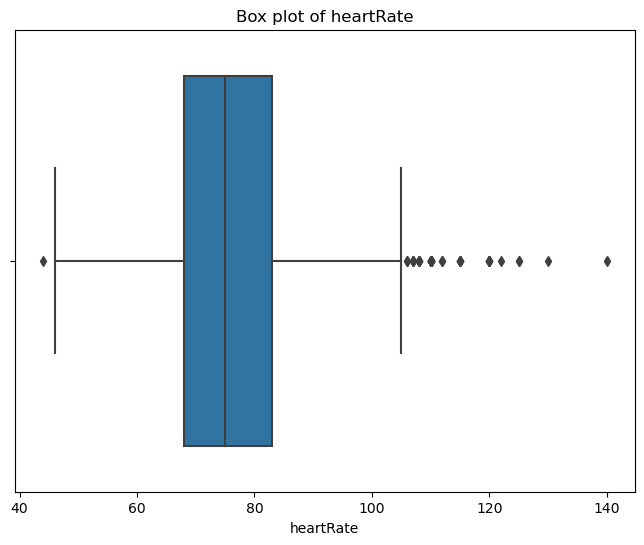

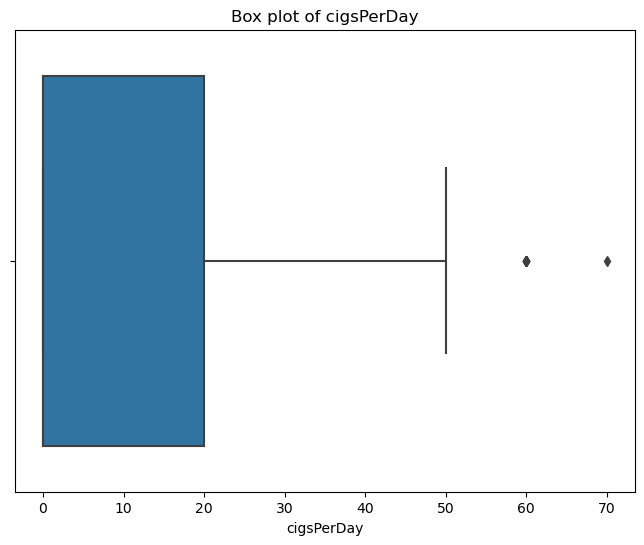

In [120]:
#Now that the data is free of missing values, we can look at outliers for variables that may contain some
key_var = ['age', 'BMI', 'sysBP', 'diaBP', 'totChol', 'glucose', 'heartRate', 'cigsPerDay']
for feature in key_var:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [121]:
#MAY RETURN TO REMOVING OUTLIERS TO IMPROVE PREDICTION
#Could use Winsorizing
"""
## Function to Windsorize a variable:
def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

sns.boxplot( winsorize(x))
"""

"\n## Function to Windsorize a variable:\ndef winsorize(x):\n    # Convert from pd to np, if necessary:\n    if type(x) == 'pandas.core.series.Series':\n        x = x.to_numpy()\n    # Compute IQR and 25, 75 quantiles:\n    pct25, pct75 = np.percentile(x,[25,75])\n    iqr = pct75 - pct25\n    # Compute whiskers:\n    lower_whisker = pct25 - iqr*1.5\n    upper_whisker = pct75 + iqr*1.5\n    # Windorize x:\n    x_winsor = np.copy(x)\n    x_winsor[ x < lower_whisker ] = lower_whisker\n    x_winsor[ x > upper_whisker ] = upper_whisker\n    return(x_winsor)\n\nsns.boxplot( winsorize(x))\n"

In [122]:
#Lets use one-hot encoding for categorical variable eduction. Will ensure regression can appropriately use this data. 
#generate a DataFrame with one-hot encoded columns for the "education" variable based on the existing numeric codes in the dataset. 
#Each education level will be represented by a separate binary column.

df_change = pd.DataFrame({'education': [1, 2, 3, 4]})

df = pd.get_dummies(df, columns=['education'], drop_first=False)
print(df)

      Unnamed: 0  sex  age  currentSmoker  cigsPerDay  BPMeds  \
0           1267    1   58              0         0.0     0.0   
1           1209    0   40              1        15.0     0.0   
2           2050    0   52              0         0.0     0.0   
3           1183    1   38              1        43.0     0.0   
4           3225    0   43              0         0.0     0.0   
...          ...  ...  ...            ...         ...     ...   
3175        1411    1   36              0         0.0     0.0   
3176         262    1   47              1        20.0     0.0   
3177        1459    1   52              0         0.0     0.0   
3178         733    0   48              1         5.0     0.0   
3179         691    0   60              1        15.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    220.0  143.0  104.0  29.85   
1                   0             0         0    199.0  122.0

In [123]:
#Begin Linear Regression with clean data

In [124]:
#Let's clean the test data in the same way quickly so that we can ensure consistency.
df01 = pd.read_csv('fhs_test.csv')

In [125]:
print(df01.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education           20
currentSmoker        0
cigsPerDay           5
BPMeds              16
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             11
sysBP                0
diaBP                0
BMI                  4
heartRate            1
glucose            103
TenYearCHD           0
dtype: int64


In [126]:
df01['education'].fillna(df01['heartRate'].median(), inplace=True)
df01['cigsPerDay'].fillna(df01['heartRate'].median(), inplace=True)
df01['BPMeds'].fillna(df01['heartRate'].median(), inplace=True)
df01['totChol'].fillna(df01['heartRate'].median(), inplace=True)
df01['heartRate'].fillna(df01['heartRate'].median(), inplace=True)
df01['BMI'].fillna(df01['BMI'].median(), inplace=True)

In [127]:
print(df01.isnull().sum())

Unnamed: 0           0
sex                  0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            103
TenYearCHD           0
dtype: int64


In [128]:
# Separate data
complete_testing = df01[df01['glucose'].notnull()]
missing_testing = df01[df01['glucose'].isnull()]

In [129]:
#Define features and target for imputation
X_ttrain = complete_testing.drop(['glucose'], axis=1)
y_ttrain = complete_testing['glucose']
X_tincomplete = missing_testing.drop(['glucose'], axis=1)

# init. and train linear regression model for imputation
imputation_testing = LinearRegression()
imputation_testing.fit(X_ttrain, y_ttrain)

# missing values
imputed_tvalues = imputation_testing.predict(X_tincomplete)

# Fill missing values in the original dataframe
df01.loc[df01['glucose'].isnull(), 'glucose'] = imputed_tvalues

In [130]:
df01_change = pd.DataFrame({'education': [1, 2, 3, 4]})

df01 = pd.get_dummies(df01, columns=['education'], drop_first=False)

In [131]:
training_data = df
testing_data = df01

In [132]:
combined_data = pd.concat([training_data, testing_data])

In [133]:
categorical_cols = ['sex', 'education_1.0','education_2.0','education_3.0','education_4.0', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [134]:
# apply OneHotEncoder to categorical columns
encoder = OneHotEncoder()
X_combined_encoded = encoder.fit_transform(combined_data[categorical_cols]).toarray()

In [136]:
#Combine encoded categorical columns and numerical columns
X_combined_encoded = pd.DataFrame(X_combined_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_combined_encoded[numerical_cols] = combined_data[numerical_cols].values

In [138]:
y_combined = combined_data['TenYearCHD']

In [156]:
#now that the data is consisten, split back up again:
X_train_encoded = X_combined_encoded[:len(training_data)]
X_test_encoded = X_combined_encoded[len(training_data):]
y_train = y_combined[:len(training_data)]
y_test = y_combined[len(training_data):]

In [157]:
#REGRESSION MODEL
reg_model = LinearRegression()

In [158]:
reg_model.fit(X_train_encoded, y_train)

LinearRegression()

In [161]:
# Get coefficients and corresponding feature names
coefficients = reg_model.coef_
feature_names_encoded = list(X_train_encoded.columns)

# Combine feature names and coefficients
feature_coefficients = list(zip(feature_names_encoded, coefficients))

# Sort the feature coefficients by absolute coefficient value in descending order
sorted_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Display the top positive coefficients
num_top_coefficients = 10  # You can adjust this number as needed
print(f"Top {num_top_coefficients} Positive Coefficients:")
count = 0
for feature, coefficient in sorted_coefficients:
    if count >= num_top_coefficients:
        break
    if coefficient > 0:  # Only print positive coefficients
        print(f"{feature}: {coefficient:.4f}")
        count += 1

Top 10 Positive Coefficients:
prevalentStroke_1: 0.0929
BPMeds_1.0: 0.0349
sex_1: 0.0308
diabetes_1: 0.0281
education_2.0_False: 0.0108
prevalentHyp_1: 0.0104
currentSmoker_0: 0.0088
age: 0.0066
education_4.0_True: 0.0046
education_1.0_True: 0.0036


In [162]:
#PREDICTION
y_pred = reg_model.predict(X_test_encoded)

In [163]:
#EVALUATION
diff_squared = (y_test - y_pred) ** 2
MSE = diff_squared.mean()
print("Mean Squared Error: " , MSE)
print("Root Mean Squared Error: " , np.sqrt(MSE))

Mean Squared Error:  0.1150882699932469
Root Mean Squared Error:  0.33924662119650784


In [164]:
var_y = y_test.var()
r2 = 1 - (MSE / var_y)
print("R-squared Score:", r2)

R-squared Score: 0.08873333334589317


In [165]:
#There is clearly a (really) poor fit. Lets graph

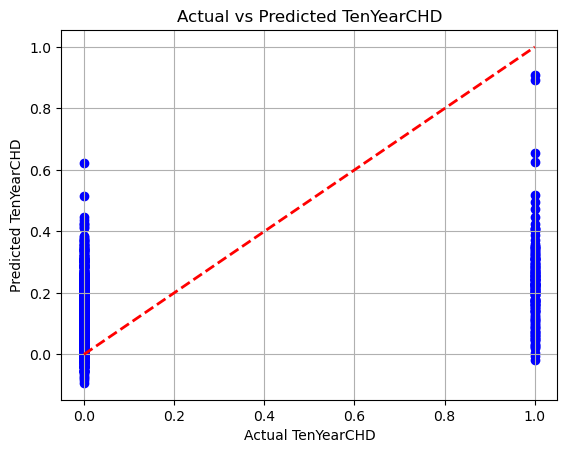

In [166]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('Actual TenYearCHD')
plt.ylabel('Predicted TenYearCHD')
plt.title('Actual vs Predicted TenYearCHD')
plt.grid(True)
plt.show()

Linear regression doesn't do the best job at predicting binary outcomes, as we can see here. Instead, I will try to implement some sort of logistic regression which can better represent the probability of a binary outcome (yes or no) as we have here. 

We will use a scaler which is recommended for logistic regression. Although this method was mentioned at the end of our linear regression lecutre, I want to note that this wasn't formally taught so I am using outside resources as a guide for performing this. We already have our test and training sets 

In [167]:
from sklearn.preprocessing import StandardScaler
#indicates that you do not want to center (subtract the mean) from the data.
#This parameter is particularly relevant when working with sparse matrices or when centering is not meaningful or feasible for the data.
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [168]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(random_state=100)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=100)

In [169]:
y_log_pred = log_model.predict(X_test_scaled)

In [170]:
#EVALUATION

Mean Squared Error (MSE) and R-squared (R2) don' evaluate a logistic regression model because these metrics are specific to regression tasks, not classification tasks like logistic regression. We have to use binary classification metrics imported from "sklearn.metrics".

In [171]:
# probability predictions
y_log_prob = log_model.predict_proba(X_test_scaled)[:, 1]  # Probability CHD

# probabilities to binary labels using 0.5
y_log_pred = (y_log_prob >= 0.5).astype(int)  # binary class labels (0 or 1)

In [172]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_log_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_log_pred))

Confusion Matrix:
[[894   9]
 [144  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       903
           1       0.59      0.08      0.15       157

    accuracy                           0.86      1060
   macro avg       0.73      0.54      0.53      1060
weighted avg       0.82      0.86      0.81      1060



We did a little better here but don't have high precision for predicting CHD. The low recall for class 1 suggests that the model has difficulty identifying true positive cases of CHD. Overall accuracy is 85% which is pretty good but given the much higher number of non. CHD and that having higher accuracy it doesn't tell a the entire story. 

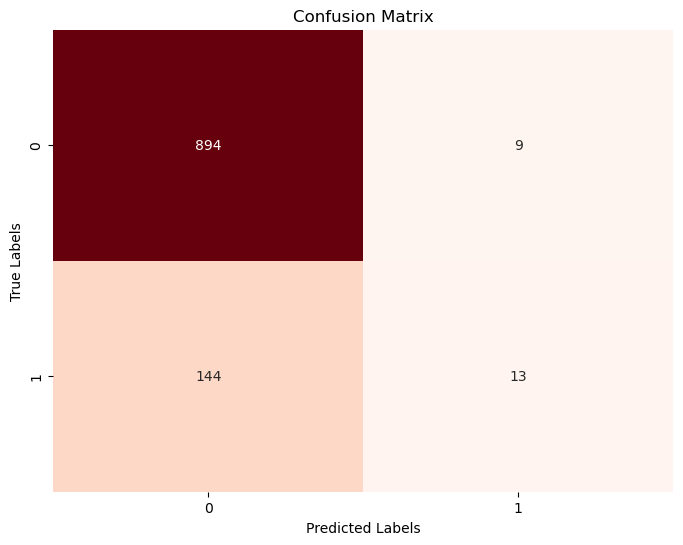

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

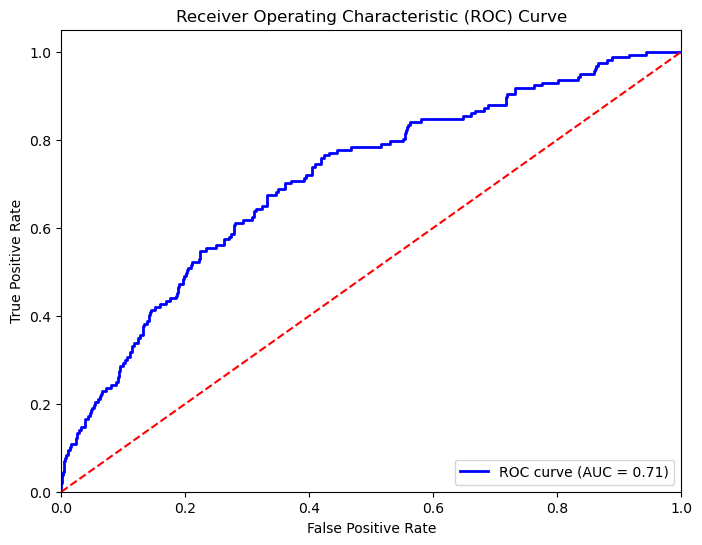

In [155]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_log_prob)
roc_auc = roc_auc_score(y_test, y_log_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The ROC curve is a graphical representation of the true positive rate (sensitivity) against the false positive rate (1 - specificity) at various threshold settings. It shows the trade-off between sensitivity and specificity. A curve that hugs the upper left corner indicates a better-performing model.

The AUC score quantifies the overall performance of the model across all threshold settings. It ranges from 0 to 1, where a score closer to 1 indicates better discrimination power of the model (i.e., the model can distinguish between positive and negative cases more effectively). An AUC of .5 means it would do no better than randomly picking. That said, and AUC of .71 is considered good, though there is room for improvement. 

Overall, logistic regression is  more useful for predicting CHD than linear regression. 